## Style Transfer

In [0]:
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
vgg = models.vgg19(pretrained=True)

In [157]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [158]:
vgg.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [0]:
for param in vgg.features.parameters():
  param.requires_grad = False

In [160]:
for param in vgg.features.parameters():
  print (param.requires_grad, end = ' ')

False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False 

In [161]:
for param in vgg.classifier.parameters():
  print (param.requires_grad, end = ' ')

True True True True True True 

In [162]:
#from the output we can infer that non parameters in the maxpool layers
len(list(vgg.features.parameters())), len(list(vgg.classifier.parameters()))

(32, 6)

In [163]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [0]:
def load_image(img_path, max_size = 400, shape = None):
  image = Image.open(img_path).convert('RGB')
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)
  if shape is not None:
    size = shape
  in_transform = transforms.Compose([
                                      transforms.Resize(size),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5]*3, [0.5]*3)
                                    ])
  image = in_transform(image). unsqueeze(0) #add one more dimension-batch_size
  return image

In [0]:
content = load_image('rose.jpeg').to(device)
#style = load_image('StarryNight.jpg').to(device)
#style = load_image('StarryNight.jpg', shape = content.shape[-2:]).to(device)
style = load_image('MonaLisa.jpg', shape = content.shape[-2:]).to(device)

In [260]:
print (content.shape, content.shape[-2:])
print (style.shape, style.shape[-2:])

torch.Size([1, 3, 533, 400]) torch.Size([533, 400])
torch.Size([1, 3, 533, 400]) torch.Size([533, 400])


In [261]:
content.size() #is equivalent with .shape

torch.Size([1, 3, 533, 400])

In [0]:
#convert tensor to numpy array
def im_convert(tensor):
  image = tensor.cpu().clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1, 2, 0)
  image = image*np.array([0.5]*3) + np.array([0.5]*3)
  image = image.clip(0, 1)
  return image

(-0.5, 399.5, 532.5, -0.5)

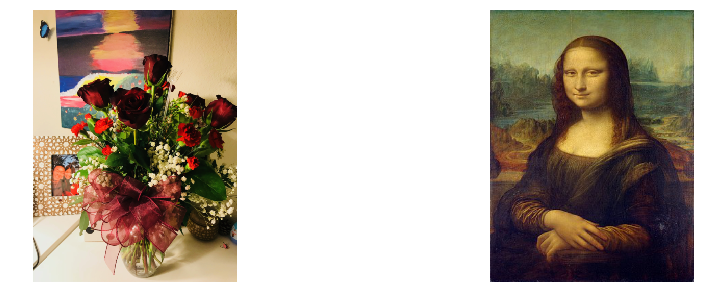

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.imshow(im_convert(content))
ax1.axis('off')
ax2.imshow(im_convert(style))
ax2.axis('off')

In [264]:
for name, layer in vgg._modules.items():
  print (name, layer)

features Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, pa

In [0]:
def get_features(image, model):
  layers = {'0': 'conv1_1', '5': 'conv2_1', '10': 'conv3_1', 
            '19': 'conv4_1', '21': 'conv4_2', #4_2 is used only for content extraction
            '28': 'conv5_1'}
  features = {}
  for name, layer in model.features._modules.items(): #only look at the features part
    image = layer(image) #propogate through the network
    if name in layers:
      features[layers[name]] = image
  return features

In [0]:
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

In [0]:
def gram_matrix(tensor):
  _, d, h, w = tensor.size()
  tensor = tensor.view(d, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [0]:
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

In [0]:
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}
#weights for content and style losses
content_weight = 1
style_weight = 1e6

target = content.clone().requires_grad_(True).to(device)

In [0]:
show_every = 300
optimizer = torch.optim.Adam([target], lr = 0.002)
steps = 2100

height, width, channels = im_convert(target).shape
image_array = np.empty([300, height, width, channels])
capture_frame = steps/300
counter = 0

Total Loss: 1769962340352.0 Iteration: 300


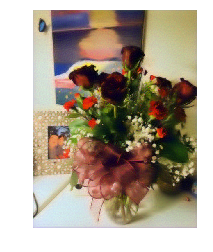

Total Loss: 959882395648.0 Iteration: 600


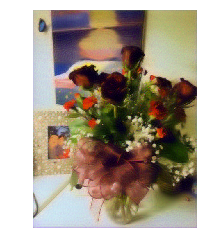

Total Loss: 691600949248.0 Iteration: 900


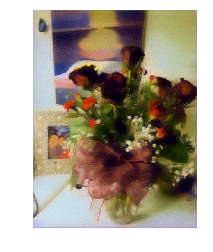

Total Loss: 528798744576.0 Iteration: 1200


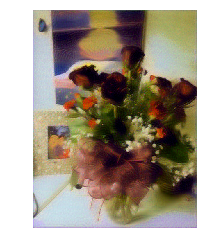

Total Loss: 411114078208.0 Iteration: 1500


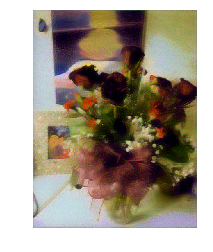

Total Loss: 321795424256.0 Iteration: 1800


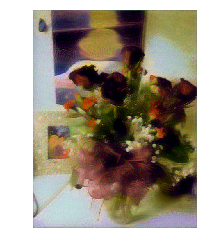

Total Loss: 253046308864.0 Iteration: 2100


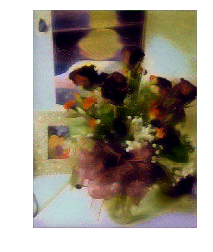

In [271]:
for ii in range(1, steps+1):
  target_features = get_features(target, vgg)
  content_loss = torch.mean((target_features['conv4_2']-content_features['conv4_2'])**2)
  style_loss = 0
  
  for layer in style_weights:
    target_feature = target_features[layer]
    target_gram = gram_matrix(target_feature)
    style_gram = style_grams[layer]
    layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    style_loss += layer_style_loss/5.0 #5 layers
    
  total_loss = content_weight*content_loss + style_weight*style_loss
  
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()
  
  if ii % show_every == 0:
    print ('Total Loss:', total_loss.item(), 'Iteration:', ii)
    plt.imshow(im_convert(target))
    plt.axis('off')
    plt.show()
    
  if ii % capture_frame == 0:
    image_array[counter] = im_convert(target)
    counter += 1 

(-0.5, 399.5, 532.5, -0.5)

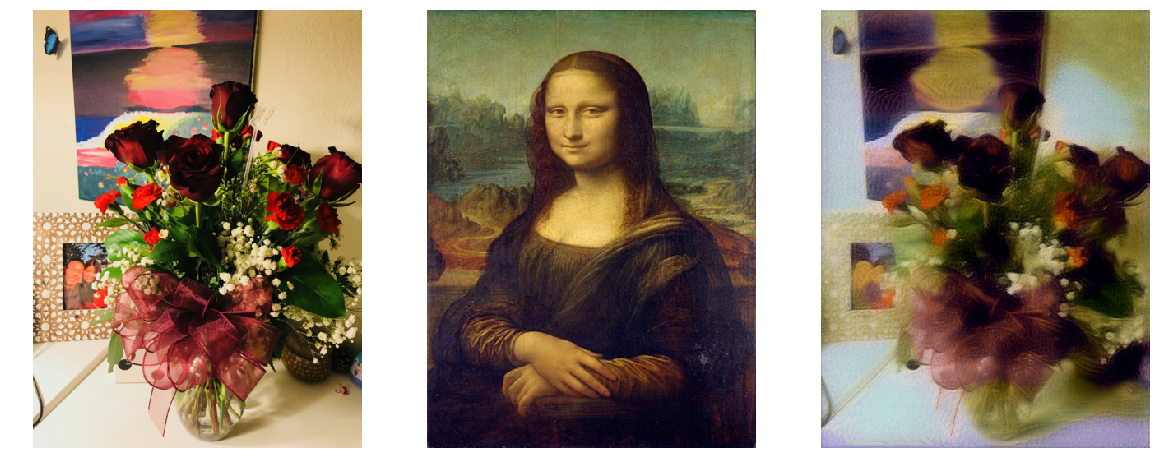

In [272]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax1.axis('off')
ax2.imshow(im_convert(style))
ax2.axis('off')
ax3.imshow(im_convert(target))
ax3.axis('off')

In [0]:
import cv2
frame_height, frame_width, _ = im_convert(target).shape
vid = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height))
for i in range(300):
  img = image_array[i]
  img *= 255
  img = np.array(img, dtype = np.uint8)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  vid.write(img)
vid.release()  